# IMPORTING LIBRARIES

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# ANALYZING THE DATA

In [130]:
df=pd.read_csv("data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [254]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [255]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,7/9/2014 0:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,7/10/2014 0:00,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# NULL VALUES DECTECTION

In [257]:
df.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [258]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [259]:
df.duplicated().sum()

0

In [260]:
df.max()

date                 7/9/2014 0:00
price                   26590000.0
bedrooms                         9
bathrooms                      8.0
sqft_living                  13540
sqft_lot                   1074218
floors                         3.5
waterfront                       1
view                             4
condition                        5
sqft_above                    9410
sqft_basement                 4820
yr_built                      2014
yr_renovated                  2014
street           Valley View Trail
city                  Yarrow Point
statezip                  WA 98354
country                        USA
dtype: object

In [261]:
df.min()

date             5/10/2014 0:00
price                       0.0
bedrooms                      0
bathrooms                   0.0
sqft_living                 370
sqft_lot                    638
floors                      1.0
waterfront                    0
view                          0
condition                     1
sqft_above                  370
sqft_basement                 0
yr_built                   1900
yr_renovated                  0
street             1 View Ln NE
city                     Algona
statezip               WA 98001
country                     USA
dtype: object

In [262]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [263]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [264]:
df.shape

(4600, 18)

In [265]:
df['yr_built'].value_counts()


2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: yr_built, Length: 115, dtype: int64

In [266]:
r=df['price'].value_counts()
r

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [267]:
r.max()


49

In [268]:
df['bedrooms'].value_counts()

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [269]:
df['statezip'].unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [270]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [271]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [272]:
df.street.value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

# DATA VISUALIZATION

<BarContainer object of 10 artists>

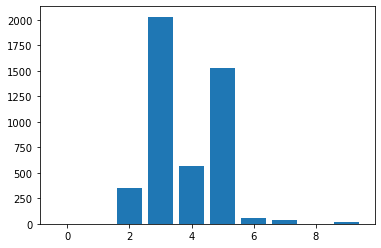

In [273]:
x=df['bedrooms'].unique()
plt.bar(x=x,height=df['bedrooms'].value_counts())

<BarContainer object of 26 artists>

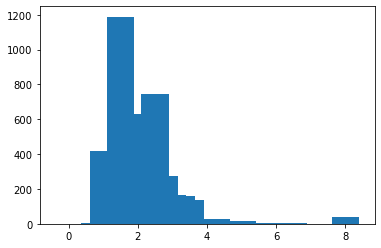

In [274]:
x=df['bathrooms'].unique()
plt.bar(x=x,height=df['bathrooms'].value_counts())

<AxesSubplot:xlabel='city'>

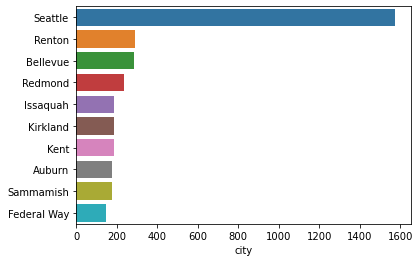

In [275]:
top_10_cities = df['city'].value_counts().head(10)
sns.barplot(x = top_10_cities, y=top_10_cities.index)

<AxesSubplot:xlabel='count', ylabel='city'>

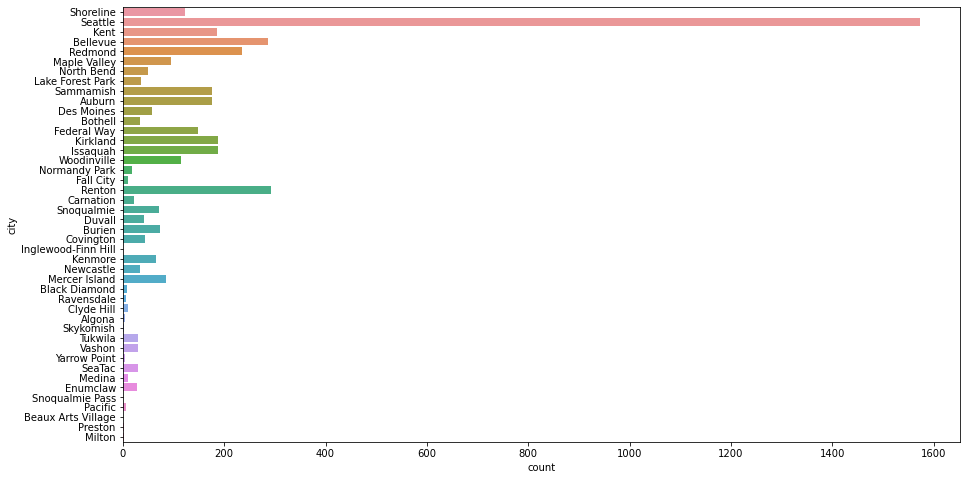

In [276]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['city'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

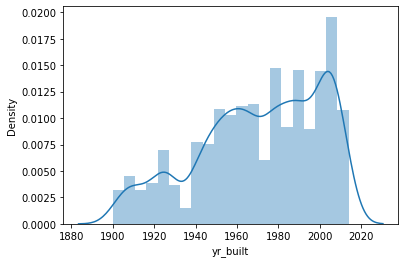

In [277]:
sns.distplot(df['yr_built'])

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

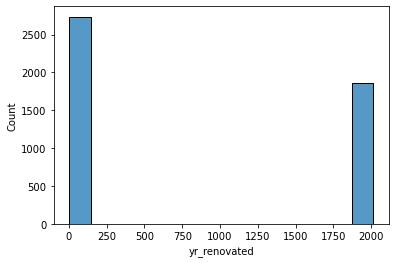

In [278]:
sns.histplot(df['yr_renovated'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

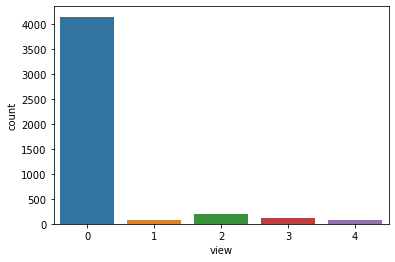

In [279]:
sns.countplot(df['view'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

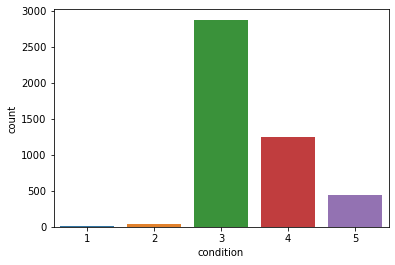

In [280]:
sns.countplot(df['condition'])

<AxesSubplot:ylabel='Frequency'>

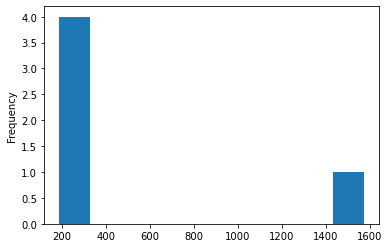

In [281]:
df.city.value_counts().head().plot.hist()

<AxesSubplot:ylabel='city'>

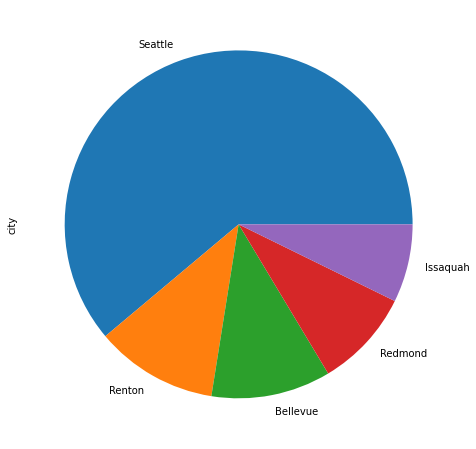

In [282]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
df.city.value_counts().head(5).plot.pie()

In [283]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [290]:
df.drop(df.index[4500:4600],inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,6/16/2014 0:00,1.637857e+05,2,1.00,760,5500,1.5,0,0,3,760,0,1947,2012,11023 4th Ave S,Seattle,WA 98168,USA
4496,6/16/2014 0:00,3.512500e+05,4,1.75,1580,5340,1.0,0,0,3,1130,450,1947,2012,214 20th Ave S,Seattle,WA 98144,USA
4497,6/17/2014 0:00,6.453250e+05,3,2.50,2670,10481,2.0,0,0,3,2670,0,2003,0,6901 123rd Ave NE,Kirkland,WA 98033,USA
4498,6/17/2014 0:00,1.712248e+05,3,1.00,1140,8366,1.0,0,0,5,1140,0,1943,0,3108 SE 6th St,Renton,WA 98058,USA


# SPLITTING X,Y


In [291]:
x=df[['sqft_living','yr_built','bedrooms','bathrooms']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# TRAINING AND TESTING

In [292]:
x_train

,sqft_living,yr_built,bedrooms,bathrooms
3707,2200,1978,3,2.50
2601,1960,1967,4,1.75
4450,2580,1950,4,2.00
2552,1150,1979,3,1.75
3416,1470,1968,3,2.00
...,...,...,...,...
1033,1270,2007,3,1.50
3264,970,1956,2,1.00
1653,2080,1987,5,2.75
2607,3070,1950,4,2.50


In [293]:
x_test

,sqft_living,yr_built,bedrooms,bathrooms
854,1410,1987,3,2.25
2560,960,1908,1,1.00
2212,970,1965,3,1.00
2347,2250,1994,3,2.50
1529,2440,1996,4,2.50
...,...,...,...,...
3845,2680,1974,3,1.75
2664,1270,1948,3,1.50
3247,930,2007,2,2.25
918,1800,1967,3,1.75


In [294]:
y_train

3707    5.800000e+05
2601    2.855000e+05
4450    5.961654e+05
2552    3.092120e+05
3416    2.546000e+05
            ...     
1033    4.400000e+05
3264    2.100000e+05
1653    5.388880e+05
2607    1.920000e+06
2732    4.750000e+05
Name: price, Length: 3600, dtype: float64

In [295]:
y_test

854     352500.0
2560    332000.0
2212    165000.0
2347    308900.0
1529    565000.0
          ...   
3845    575000.0
2664    260000.0
3247    355000.0
918     442500.0
1412    754950.0
Name: price, Length: 900, dtype: float64

In [296]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(3600, 4)
(3600,)
(900, 4)
(3600, 4)


In [297]:
model = DecisionTreeRegressor()
my_model=model.fit(x_train,y_train)
y_pred=my_model.predict(x_test)
y_pred

array([ 410000.        ,  315000.        ,  214925.        ,
        390000.        ,  693000.        ,  455000.        ,
        795000.        ,  171000.        ,  447000.        ,
        532000.        ,  610000.        ,  449000.        ,
        499950.        ,  718500.        ,  225000.        ,
        360000.        ,  379880.        , 1085000.        ,
        499950.        ,  734950.        ,  436500.        ,
        490000.        ,  549000.        ,  705380.        ,
        565000.        ,  390000.        ,  898000.        ,
             0.        ,  339000.        ,  618250.        ,
        415000.        ,  525000.        , 1750000.        ,
        650000.        ,  900000.        ,  350000.        ,
        850000.        ,  636000.        , 1100000.        ,
        604000.        ,  750000.        ,  367000.        ,
        309212.        ,  345600.        ,  284000.        ,
        850000.        ,       0.        ,  619500.        ,
        518000.        ,

# DECISION TREE

In [298]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)
# Define model
x = DecisionTreeRegressor()
# Fit model
x.fit(train_x, train_y)

DecisionTreeRegressor()

# PREDICTIONS

In [299]:
print("Making predictions for the houses:")
print(test_x)
print("The predictions are")
print(x.predict(test_x))


Making predictions for the houses:
      sqft_living  yr_built  bedrooms  bathrooms
854          1410      1987         3       2.25
2560          960      1908         1       1.00
2212          970      1965         3       1.00
2347         2250      1994         3       2.50
1529         2440      1996         4       2.50
...           ...       ...       ...        ...
3371         1230      1965         3       1.00
3548         1630      1985         3       2.50
2611         1420      2006         3       2.25
257          2600      1949         4       2.75
2510         1384      2006         3       3.00

[1125 rows x 4 columns]
The predictions are
[242450. 605000. 214925. ... 510000. 790000. 549000.]


In [308]:
data =  {'sqft_living':[1040],'yr_built':[1958],'bedrooms':[3],'bathrooms':[1]}
new_input_df = pd.DataFrame(data) 
#Showing data frame of the new input
new_input_df

,sqft_living,yr_built,bedrooms,bathrooms
0,1040,1958,3,1


In [309]:
if((new_input_df.sqft_living[0]<=0)or(new_input_df.yr_built[0]<=0)or(new_input_df.bedrooms[0]<=0)or(new_input_df.bathrooms[0]<=0)):
    print("Give appropriate input to get price")
else:
    print("The predictions price is")
    print(x.predict(new_input_df))

The predictions price is
[205000.]
